In [1]:
import matplotlib.pyplot as plt
import numpy as np
from traffic_model import TrafficModel

In [8]:
# Simulation parameters
road_length = 100
vehicle_count = 20
max_speed = 5
slowdown_probability = 0.5
steps = 50

model = TrafficModel(road_length, vehicle_count, max_speed, slowdown_probability)

In [9]:
def visualize_traffic(model):
    # Initialize a 2D numpy array representing the road with zeros
    road = np.zeros((1, model.grid.width), dtype=int)

    # Update the road array with the speed of each agent at their respective positions
    for agent in model.schedule.agents:
        road[0, agent.pos[0]] = agent.speed + 1

    # Create a matplotlib figure with a specific size
    plt.figure(figsize=(20, 1))

    # Display the road array as an image with the viridis colormap
    # Set vmin and vmax to scale the colors according to the maximum speed of the agents
    plt.imshow(road, cmap='viridis', vmin=0, vmax=model.schedule.agents[0].max_speed + 1)

    # Customize the plot's x and y ticks to remove labels and only show gridlines
    plt.xticks(np.arange(-0.5, model.grid.width - 0.5, 1), [])
    plt.yticks([], [])

    # Add gridlines to the plot with specific linestyle, linewidth, and color
    plt.grid(True, linestyle='-', linewidth=1, color='black')

    # Show the plot
    plt.show()


# Visualization
The visualization uses the 'viridis' colormap, which is a perceptually uniform color scale that ranges from dark blue to yellow. In this simulation, the colors have the following meanings:

`Dark Blue`: This color represents an empty cell on the grid, meaning there is no vehicle present in that position.
`Light Blue to Green`: These colors represent vehicles with slower speeds. As the colors transition from light blue to green, it indicates an increase in the vehicle's speed, but still at the lower end of the speed range.
`Green to Yellow`: These colors represent vehicles with faster speeds. The transition from green to yellow indicates an increase in the vehicle's speed towards its maximum speed.

In the visualization, the color intensity increases as the vehicle's speed increases, with yellow representing the maximum speed a vehicle can achieve. By observing the colors, you can easily discern the traffic flow, areas of congestion, and the impact of the inertial vehicle on the overall traffic pattern.

Step: 1


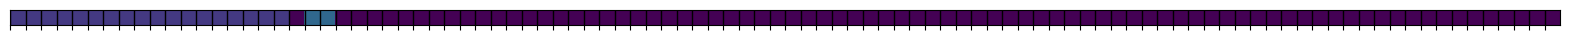

Step: 2


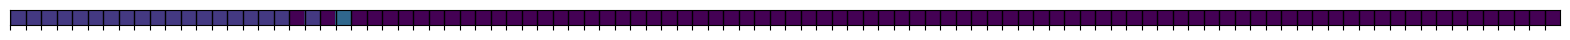

Step: 3


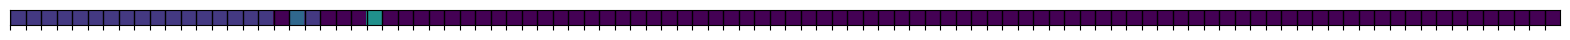

Step: 4


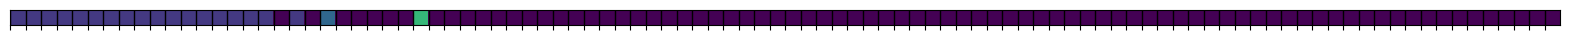

Step: 5


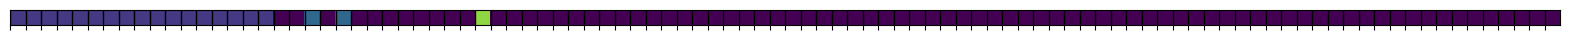

Step: 6


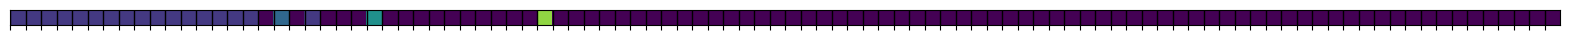

Step: 7


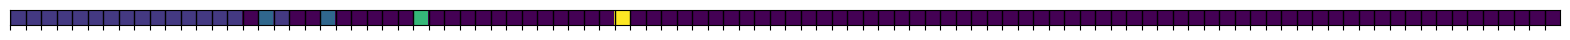

Step: 8


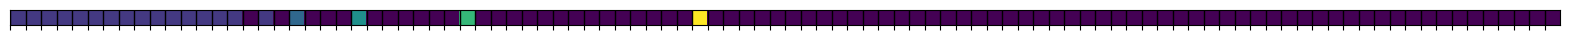

Step: 9


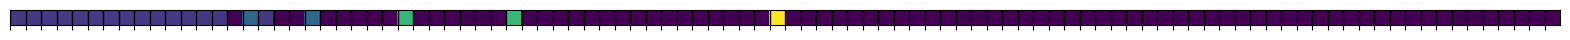

Step: 10


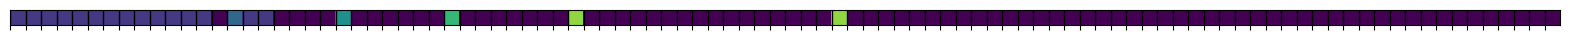

Step: 11


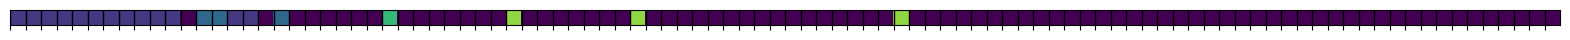

Step: 12


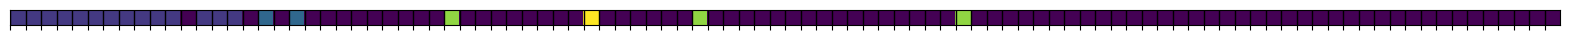

Step: 13


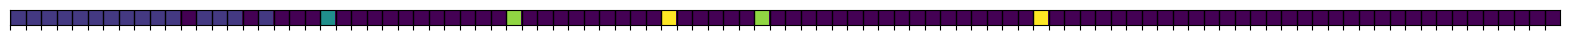

Step: 14


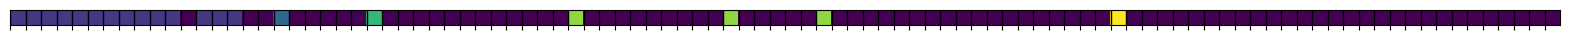

Step: 15


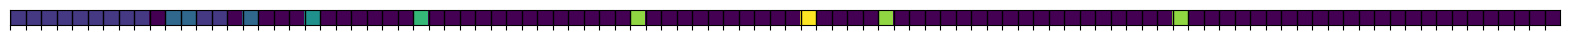

Step: 16


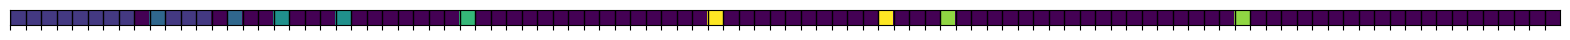

Step: 17


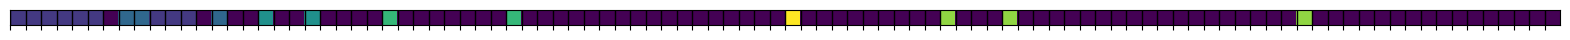

Step: 18


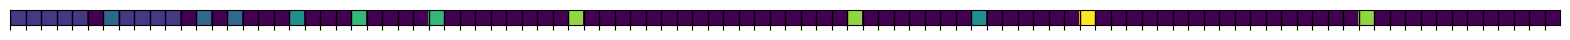

Step: 19


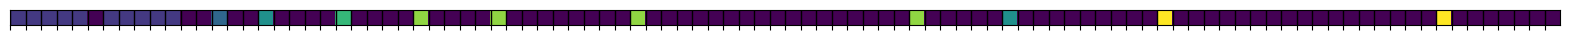

Step: 20


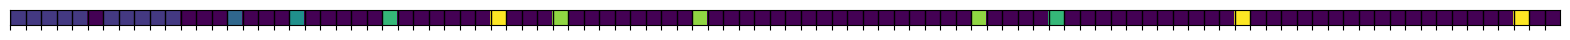

Step: 21


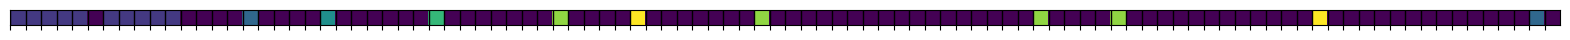

Step: 22


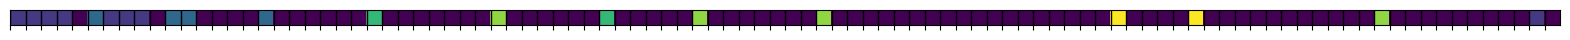

Step: 23


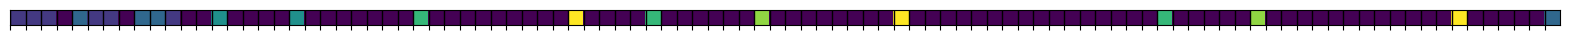

Step: 24


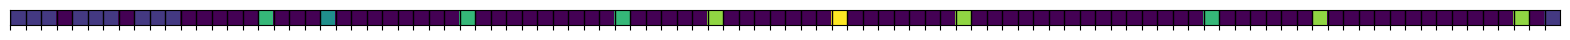

Step: 25


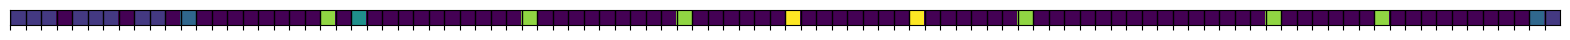

Step: 26


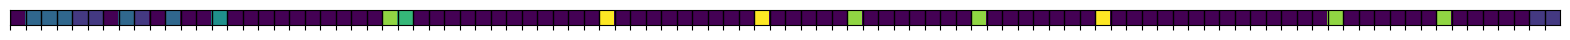

Step: 27


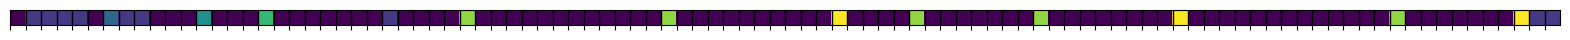

Step: 28


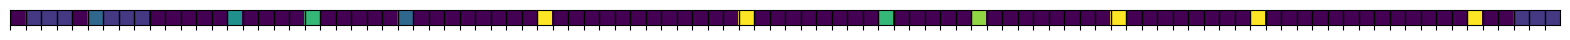

Step: 29


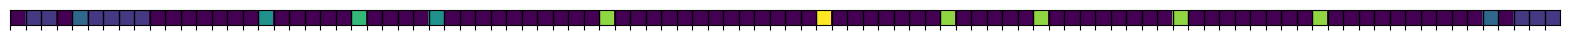

Step: 30


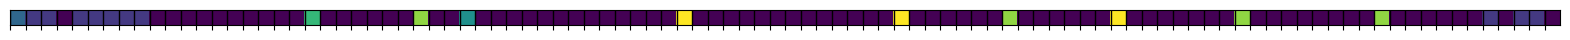

Step: 31


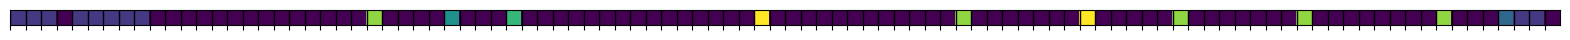

Step: 32


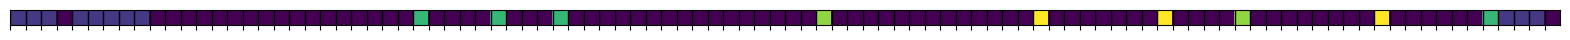

Step: 33


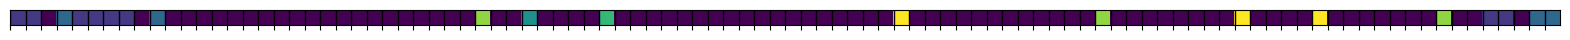

Step: 34


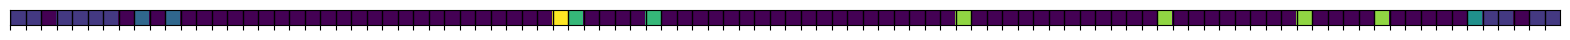

Step: 35


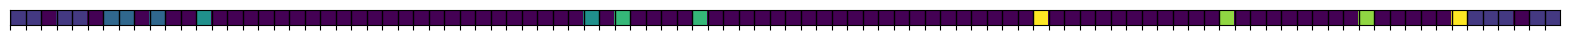

Step: 36


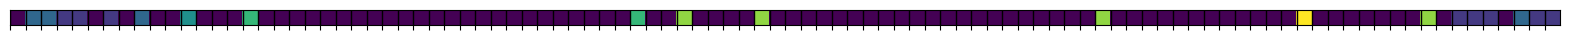

Step: 37


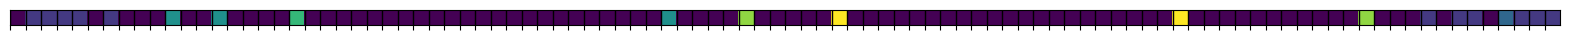

Step: 38


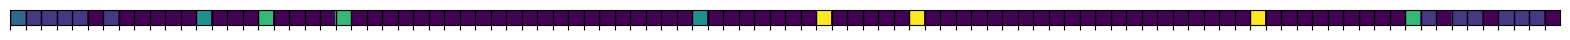

Step: 39


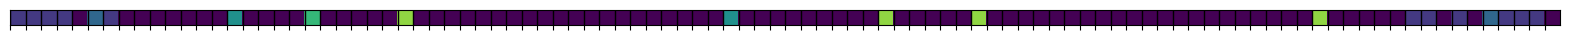

Step: 40


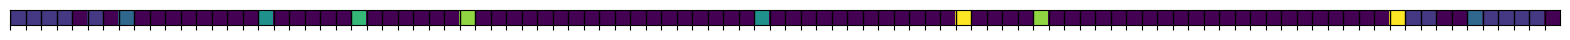

Step: 41


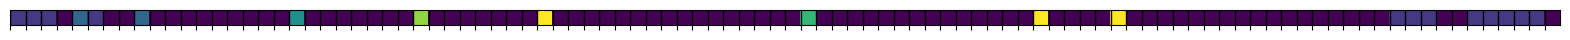

Step: 42


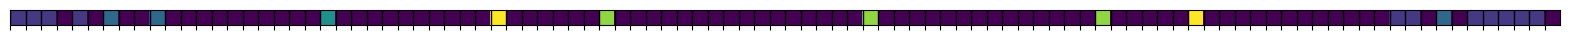

Step: 43


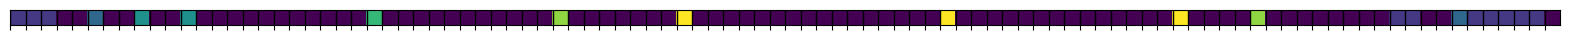

Step: 44


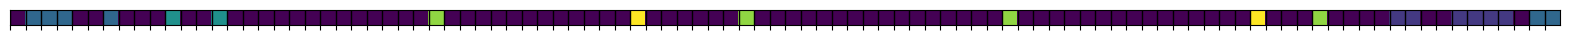

Step: 45


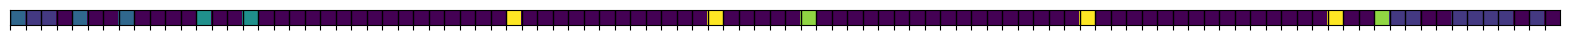

Step: 46


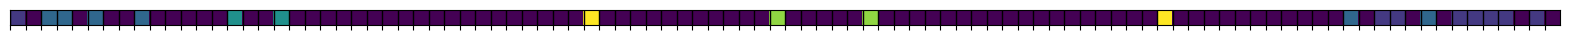

Step: 47


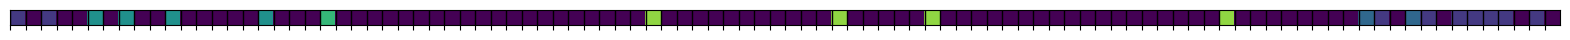

Step: 48


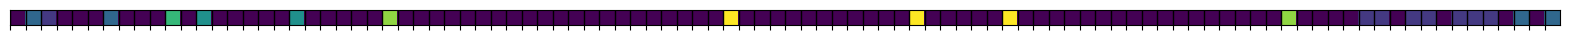

Step: 49


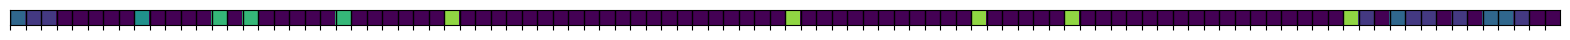

Step: 50


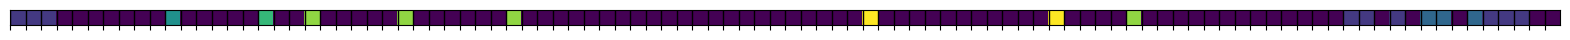

In [10]:
for i in range(steps):
    print("Step:", i + 1)
    model.step()
    visualize_traffic(model)
